### Importing libraries

In [2]:
import pandas as pd
import numpy as np
import missingno
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


### Reading data

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('gender_submission.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


### 3.  Data Dictionary:*
Survival: 0 = No, 1 = Ye
*  pclass: Ticket class 1 = 1st, 2 = 2nd  3 = r
* rs sibsp: # of siblings / spouses aboard the Titan
* ic parch: # of parents / children aboard the Titan
* ic ticket: Ticket numb
* er fare: Passenger fa
* re cabin: Cabin num
* Age: Age in years 
* sex: Sex
* er embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

### 4. Exploratory Data Analysis (EDA)

* .info()
* isnull().sum().sort_values()
* missingno.matrix()
* describe()

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


<Axes: >

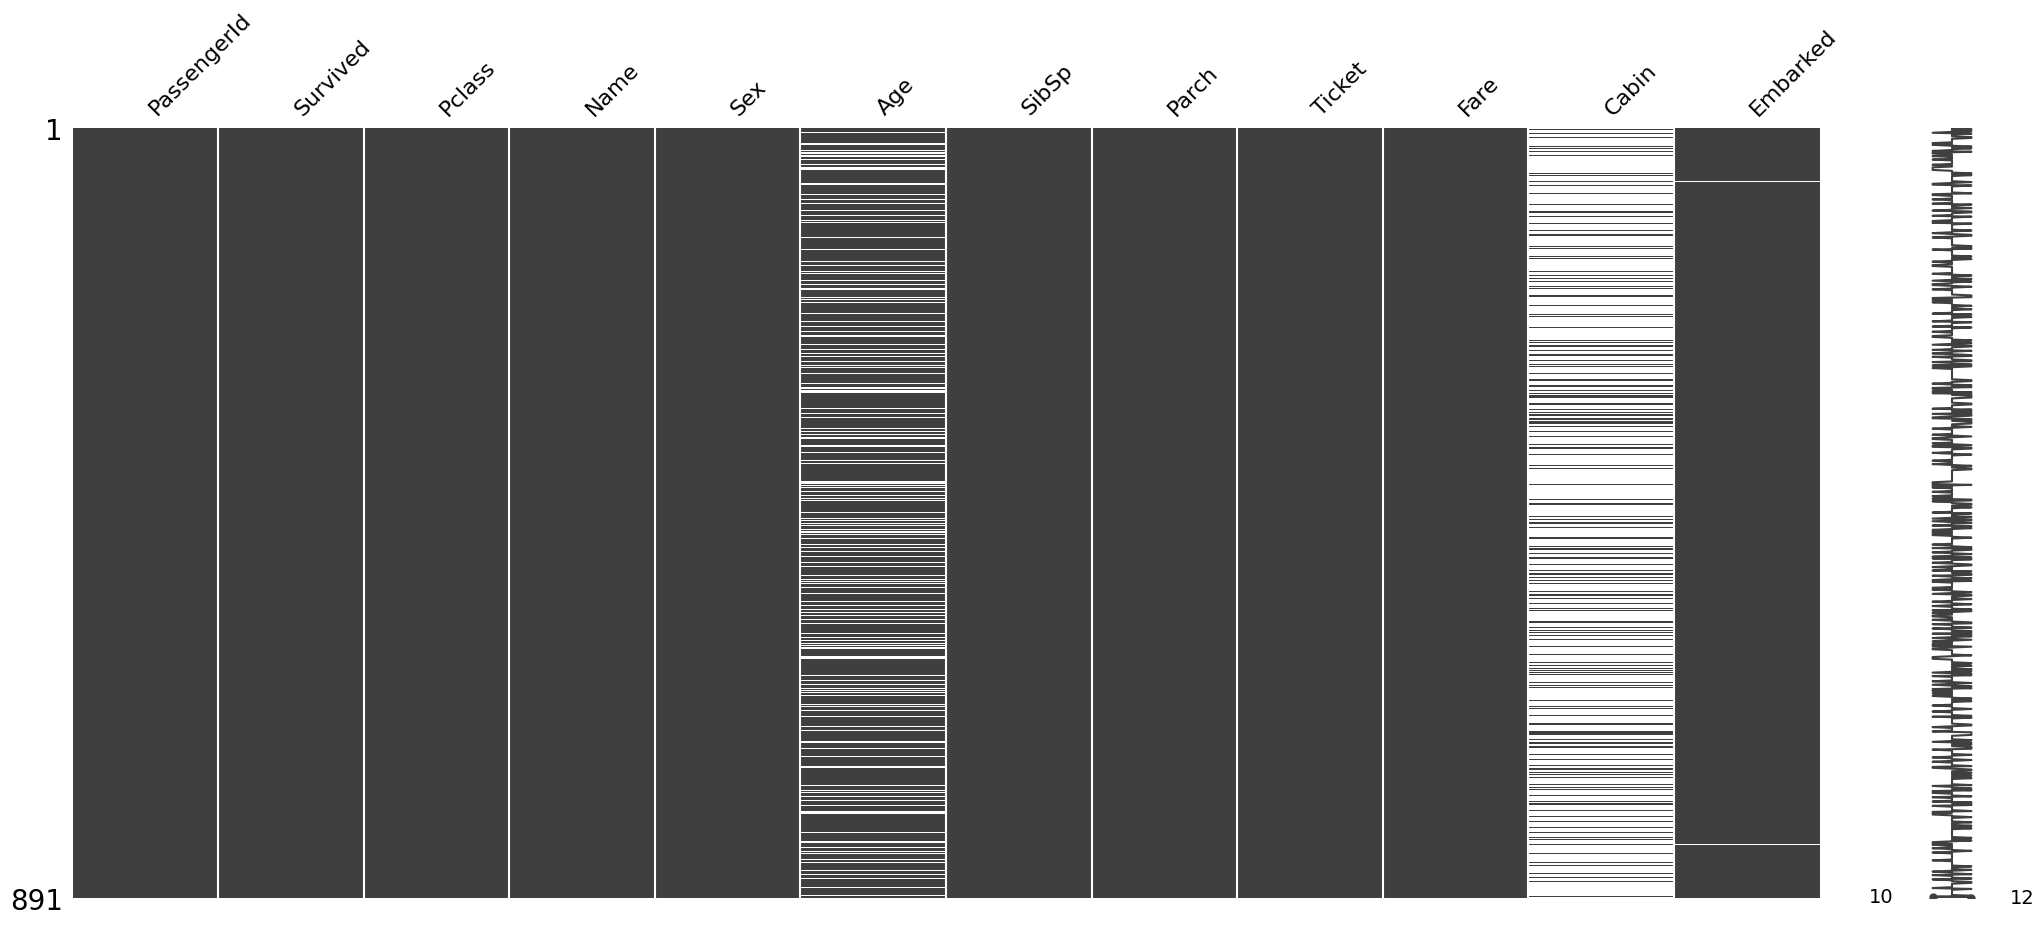

In [10]:
missingno.matrix(train)

<Axes: >

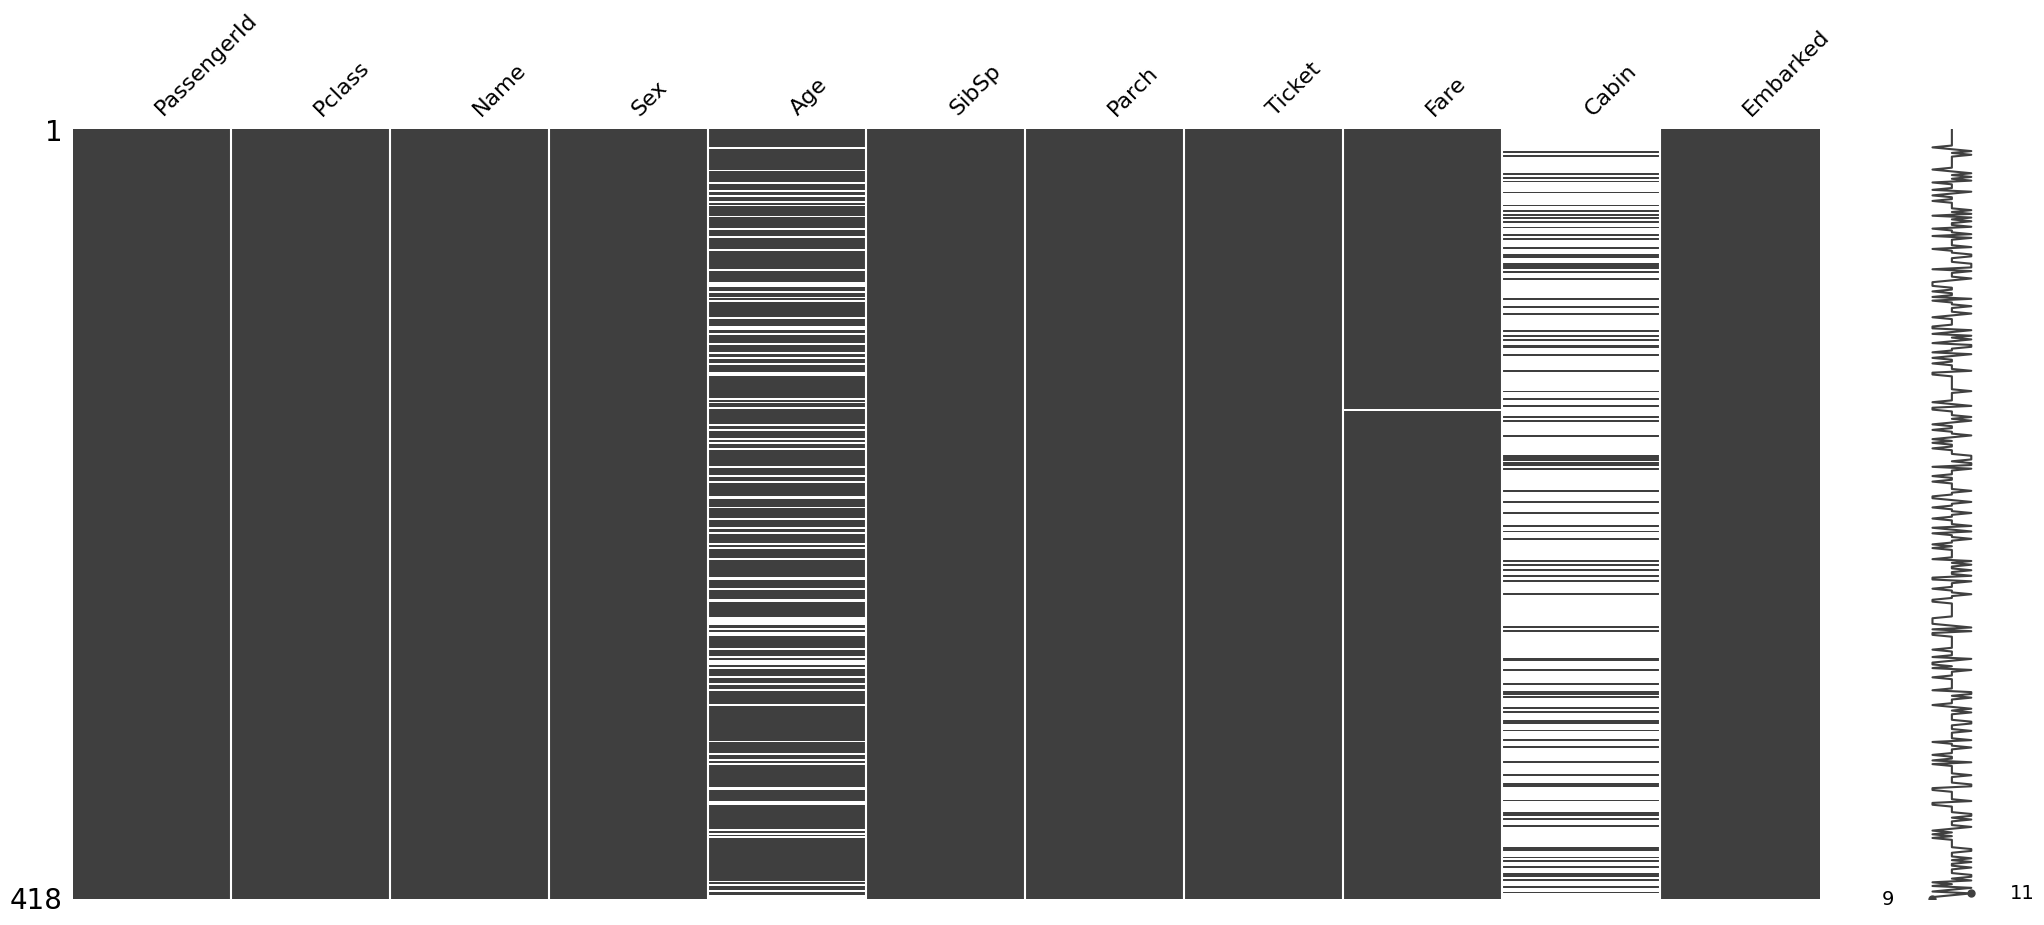

In [11]:
missingno.matrix(test)

In [12]:
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [13]:
test.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

In [15]:
train.query('Embarked == "Q"')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
790,791,0,3,"Keane, Mr. Andrew ""Andy""",male,NaN,0,0,12460,7.7500,NaN,Q
825,826,0,3,"Flynn, Mr. John",male,NaN,0,0,368323,6.9500,NaN,Q
828,829,1,3,"McCormack, Mr. Thomas Joseph",male,NaN,0,0,367228,7.7500,NaN,Q
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


#### 4.1 Feature Analysis

* PassengerId - index
* Survived - target feature

##### Categorical features:
* Pclass - cat
* Name - cat
* Sex - cat
*  'Cab - cat
*  'Embark - cat

##### Numerical features
* Age - num
* SibSp - num
* Parch - num
* Ticket - num
* Fare - numd'

#### 4.2 Categorical features

##### Pclass

In [19]:
train.Pclass.value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [31]:
train[['Parch','SibSp','Age','Pclass','Survived']].groupby('Pclass').mean().sort_values('Survived', ascending=False)

,Parch,SibSp,Age,Survived
Pclass,,,,
1,0.356481,0.416667,38.233441,0.629630
2,0.380435,0.402174,29.877630,0.472826
3,0.393075,0.615071,25.140620,0.242363


In [51]:
Pclass_sur_mean = train.groupby('Pclass')['Survived'].mean()
Pclass_sur_mean

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

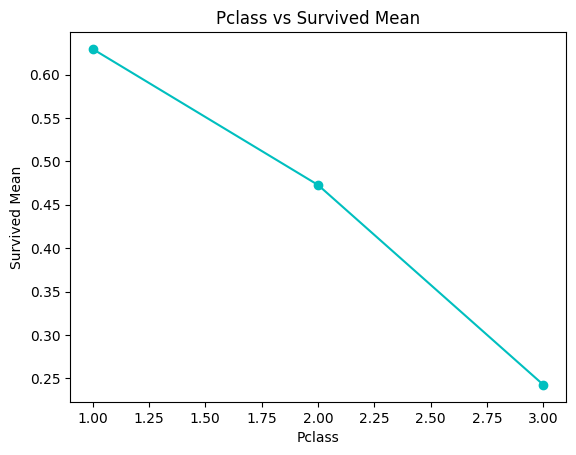

In [54]:
import matplotlib.pyplot as plt

Pclass_sur_mean = train.groupby('Pclass')['Survived'].mean()
Pclass_sur_mean.plot(marker='o', linestyle='-', color='c')
plt.title('Pclass vs Survived Mean')
plt.xlabel('Pclass')
plt.ylabel('Survived Mean')

plt.show()

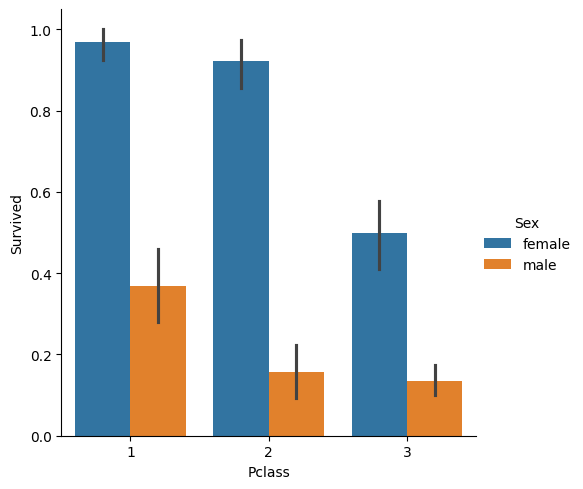

In [56]:
sns.catplot(data=train, x='Pclass', y='Survived', hue='Sex', kind='bar')

In [72]:
train[['Pclass', 'Sex']].groupby(['Pclass', 'Sex']).size().unstack(fill_value=0)

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


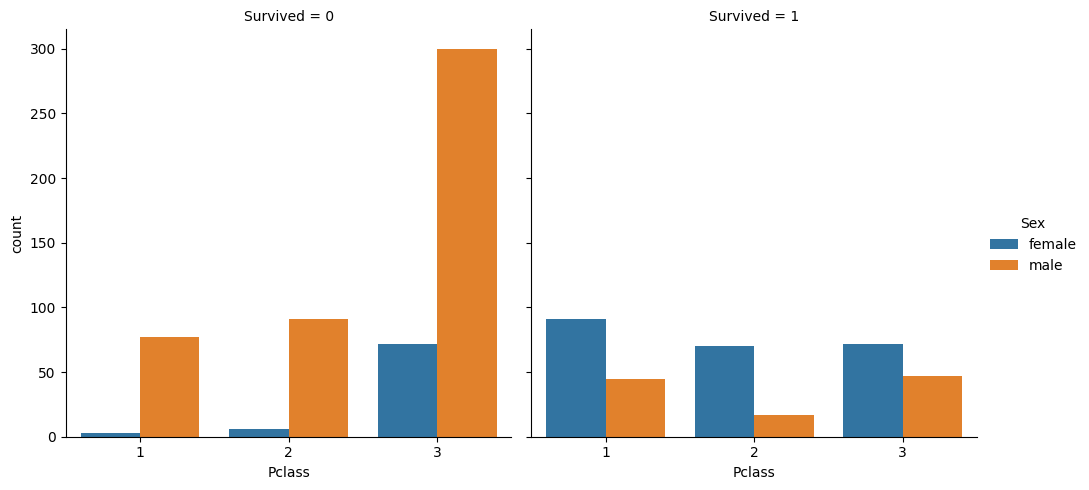

In [58]:
sns.catplot(data=train, x='Pclass', col='Survived', hue='Sex', kind='count')